In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [2]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [3]:
eda_df = df.copy()


In [4]:
eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['year'] = 0
eda_df['day'] = 0
eda_df['요일'] = 0


eda_df.date_time = pd.to_datetime(eda_df.date_time)

days = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}

eda_df['month'] = eda_df.date_time.dt.month
eda_df['hour'] = eda_df.date_time.dt.hour
eda_df['year'] = eda_df.date_time.dt.year
eda_df['day'] = eda_df.date_time.dt.day
eda_df['요일'] = eda_df['date_time'].dt.weekday.map(days)

In [5]:
input = eda_df.drop(['기온(°C)','풍속(m/s)','습도(%)','강수량(mm)','일조(hr)','비전기냉방설비운영','태양광보유','month'], axis=1)

In [6]:
mean = pd.DataFrame(input.groupby(['num','요일','hour']).mean()['전력사용량(kWh)'])

In [7]:
std = pd.DataFrame(input.groupby(['num','요일','hour']).std()['전력사용량(kWh)'])

In [8]:
total_df = pd.merge(mean, std, how='inner', left_on = ['num','요일','hour'], right_on=['num','요일','hour'])

In [9]:
total_df.reset_index(inplace=True)

total_df.columns = ['num' ,'요일', 'hour', 'mean', 'std']

In [10]:
total_df

,num,요일,hour,mean,std
0,1,금요일,0,8560.674,72.503094
1,1,금요일,1,8539.398,73.388010
2,1,금요일,2,8524.980,75.023042
3,1,금요일,3,8507.646,72.510991
4,1,금요일,4,8493.390,69.498200
...,...,...,...,...,...
10075,60,화요일,19,3415.680,371.296048
10076,60,화요일,20,3347.388,300.602106
10077,60,화요일,21,3310.596,272.269783
10078,60,화요일,22,3170.664,206.805718


In [12]:
eda_df_1 = eda_df[eda_df['num']==1]

In [16]:
eda_df_1.columns[3:]

Index(['기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유',
       'month', 'hour', 'year', 'day', '요일'],
      dtype='object')

In [18]:
one = eda_df_1.drop(eda_df_1.columns[3:], axis=1)

In [20]:
one.drop(['num'], axis=1, inplace=True)

In [23]:
one.set_index('date_time', inplace=True)

In [24]:
one

,전력사용량(kWh)
date_time,
2020-06-01 00:00:00,8179.056
2020-06-01 01:00:00,8135.640
2020-06-01 02:00:00,8107.128
2020-06-01 03:00:00,8048.808
2020-06-01 04:00:00,8043.624
...,...
2020-08-24 19:00:00,8714.952
2020-08-24 20:00:00,8740.224
2020-08-24 21:00:00,8730.504


In [27]:
from statsmodels.tsa.stattools import adfuller

In [36]:
adf_result = []
for i in range(1,61):
    print(i)
    eda_df_1 = eda_df[eda_df['num']==i]
    test_df = eda_df_1.drop(eda_df_1.columns[3:], axis=1)
    test_df.drop(['num'], axis=1, inplace=True)
    test_df.set_index('date_time', inplace=True)


    result = adfuller(test_df['전력사용량(kWh)'].values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    print('--------------------------------------')

    adf_result.append([result[0], result[1]])

1
ADF Statistic: -5.900664
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
--------------------------------------
2
ADF Statistic: -6.205480
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
--------------------------------------
3
ADF Statistic: -2.535796
p-value: 0.107006
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
--------------------------------------
4
ADF Statistic: -3.633124
p-value: 0.005158
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
--------------------------------------
5
ADF Statistic: -5.916459
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
--------------------------------------
6
ADF Statistic: -6.510503
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
--------------------------------------
7
ADF Statistic: -7.272137
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
--------------------------------------
8
ADF Statistic: -6.313820
p-value

In [39]:
stationary_count = sum(1 for _, p_value in adf_result if p_value < 0.05)
non_stationary_count = len(adf_result) - stationary_count

stationary_count, non_stationary_count

(46, 14)

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf

In [64]:
acf_results = []

for i in range(1,61):
    eda_df_1 = eda_df[eda_df['num']==i]
    test_df = eda_df_1.drop(eda_df_1.columns[3:], axis=1)
    test_df.drop(['num'], axis=1, inplace=True)
    test_df.set_index('date_time', inplace=True)

    # 추세 확인
    rolling_mean = test_df.rolling(window=12).mean()
    trend_slope = (rolling_mean.iloc[-1] - rolling_mean.iloc[0]) / len(rolling_mean)

    # 계절성 확인
    decomposition = seasonal_decompose(test_df, model='additive', period=12)
    seasonality_variance = np.var(decomposition.seasonal)

    varinace = test_df.var().values[0]

    variance_ratio = seasonality_variance / varinace

    # ACF 확인
    acf_values = acf(test_df, nlags=1)
    first_lag_acf = acf_values[1]

    acf_results.append((i, trend_slope, seasonality_variance, varinace, variance_ratio, first_lag_acf))

results_df = pd.DataFrame(acf_results, columns=["Company", "Trend_Slope", "Seasonality_Variance", 'Variance', "variance_ratio","First_Lag_ACF"])

In [66]:
decomposition.seasonal

date_time
2020-06-01 00:00:00    -53.233724
2020-06-01 01:00:00    -80.856673
2020-06-01 02:00:00    -53.152564
2020-06-01 03:00:00    -52.591156
2020-06-01 04:00:00     -8.712375
                          ...    
2020-08-24 19:00:00      5.815010
2020-08-24 20:00:00     84.317164
2020-08-24 21:00:00    135.488608
2020-08-24 22:00:00    110.606537
2020-08-24 23:00:00      5.004158
Name: seasonal, Length: 2040, dtype: float64

In [69]:
results_df.sort_values(by='First_Lag_ACF', ascending=False)

,Company,Trend_Slope,Seasonality_Variance,Variance,variance_ratio,First_Lag_ACF
23,24,전력사용량(kWh) NaN dtype: float64,107.340279,1.654531e+05,0.000649,0.967018
21,22,전력사용량(kWh) NaN dtype: float64,1425.367917,6.787927e+04,0.020999,0.965323
27,28,전력사용량(kWh) NaN dtype: float64,5430.263667,3.210267e+05,0.016915,0.961315
43,44,전력사용량(kWh) NaN dtype: float64,3537.457384,2.445196e+05,0.014467,0.961139
0,1,전력사용량(kWh) NaN dtype: float64,212.761098,1.696902e+04,0.012538,0.960808
45,46,전력사용량(kWh) NaN dtype: float64,11349.109679,7.515575e+05,0.015101,0.959371
53,54,전력사용량(kWh) NaN dtype: float64,2932.231527,1.545263e+06,0.001898,0.959004
16,17,전력사용량(kWh) NaN dtype: float64,1758.250922,2.529286e+05,0.006952,0.958559
47,48,전력사용량(kWh) NaN dtype: float64,16001.591191,6.926695e+05,0.023101,0.955642
54,55,전력사용량(kWh) NaN dtype: float64,13670.067972,4.426074e+05,0.030885,0.955542


In [67]:
results_df['variance_ratio']*100

0      1.253821
1      1.238561
2      1.538573
3      4.093840
4     23.102705
5      3.226404
6      3.665800
7      2.192068
8      0.897889
9      3.328417
10     2.655774
11     1.128999
12     2.576399
13     0.865598
14     8.661646
15     1.493492
16     0.695157
17     4.231868
18    18.592639
19    24.441785
20    14.100255
21     2.099858
22     2.598514
23     0.064877
24     5.658618
25     5.180453
26     2.852488
27     1.691530
28     5.917673
29     2.159089
30     1.636937
31     3.527529
32     2.909679
33    11.587293
34     4.670932
35     8.878118
36     2.976631
37     5.627344
38     1.785035
39     8.154872
40     2.993618
41    14.337481
42     2.367993
43     1.446697
44     6.606612
45     1.510079
46     2.084562
47     2.310133
48    22.908363
49    18.918842
50    22.482427
51     1.579243
52     3.973463
53     0.189756
54     3.088531
55     6.177581
56    10.290320
57     3.812382
58     0.911712
59     2.795032
Name: variance_ratio, dtype: float64

In [42]:
decomposition = seasonal_decompose(test_df)

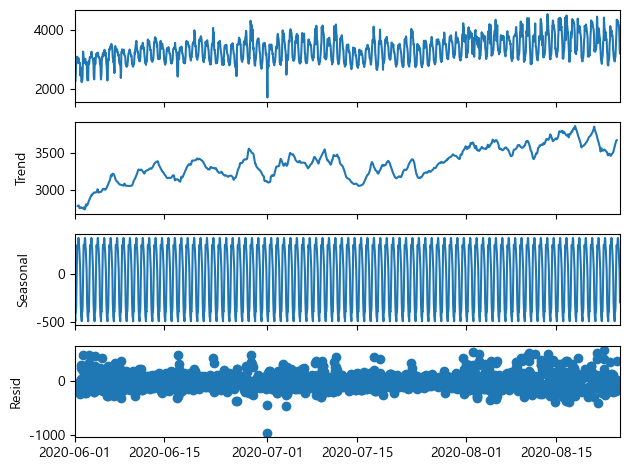

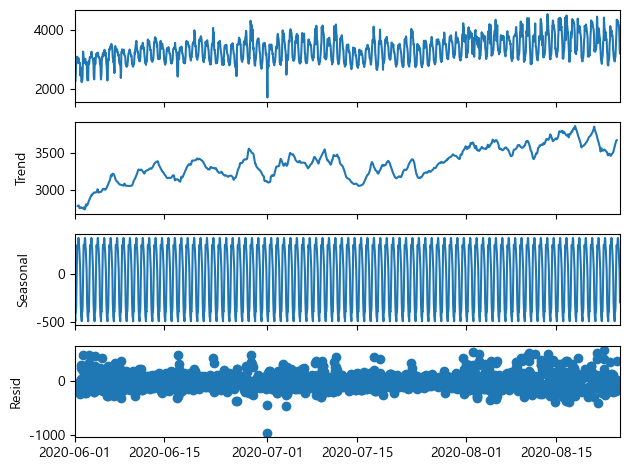

In [44]:
decomposition.plot()